# Hierarchical Clustering 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix, classification_report

## Wine.csv Dataset 

In [4]:
wine_data = pd.read_csv("Data/Wine.csv", na_values='?').dropna()
wine_data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
wine_data['Type'] = wine_data['Type'] - 1
number_of_unique_classes = np.unique(np.array(wine_data.Type))
print("Unique classes in response: %s" % number_of_unique_classes)

Unique classes in response: [0 1 2]


`Alcohol` vs. `Malic`

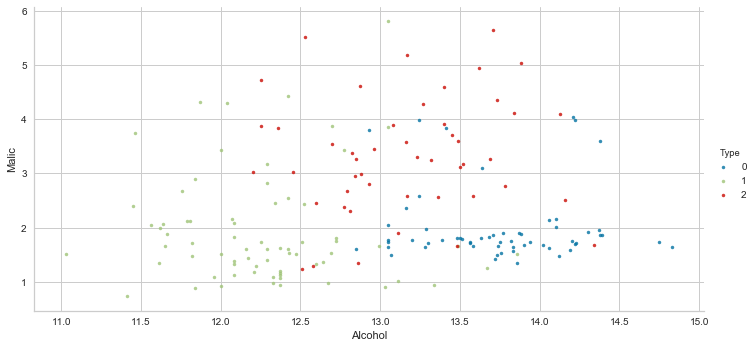

In [6]:
sns.lmplot(x = "Alcohol", y = "Malic", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Alcalinity` vs. `Magnesium`

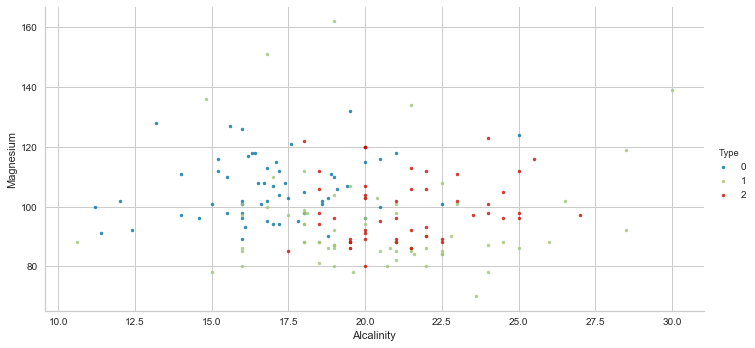

In [7]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Flavanoids` vs. `Color`

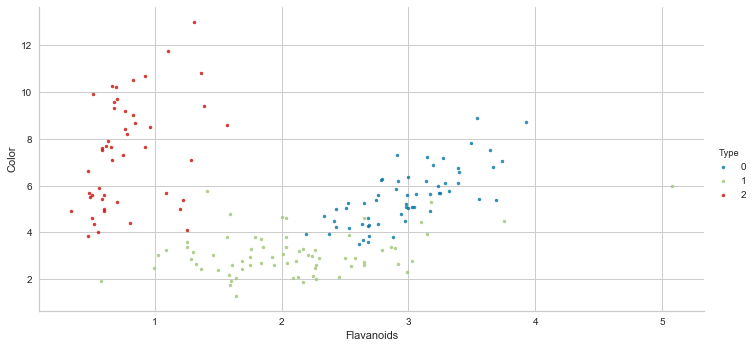

In [8]:
sns.lmplot(x = "Flavanoids", y = "Color", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Alcalinity` vs. `Color`

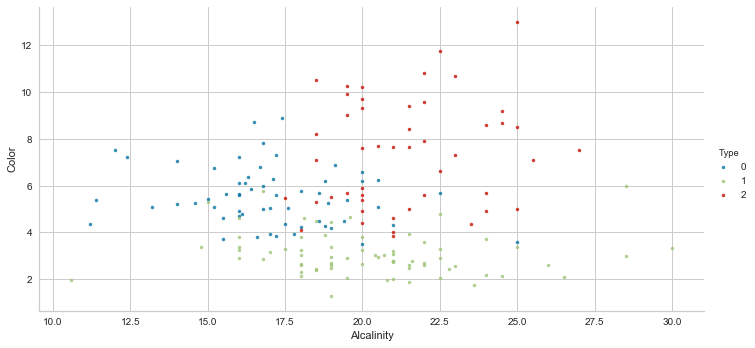

In [9]:
sns.lmplot(x = "Alcalinity", y = "Color", data = wine_data, 
           hue = "Type", fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [10]:
X = wine_data.drop(['Type'], axis = 1)
y = wine_data['Type'].values

In [11]:
print("X has shapes: %s" % str((X.shape)))

X has shapes: (178, 13)


## Hierchical Clustering (n_clusters = 3)

In [12]:
model_hierarchical = AgglomerativeClustering(n_clusters = 3)
print(model_hierarchical)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)


In [13]:
model_hierarchical_fit = model_hierarchical.fit(X)
model_hierarchical_fit.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [14]:
clusters = model_hierarchical_fit.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1 2]


In [15]:
print(".fit_predict output is the same as .labels_: %s" % all(clusters == model_hierarchical_fit.labels_))

.fit_predict output is the same as .labels_: True


In [16]:
X['hierarchical_clusters'] = clusters
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hierarchical_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


`Alcohol` vs. `Malic`

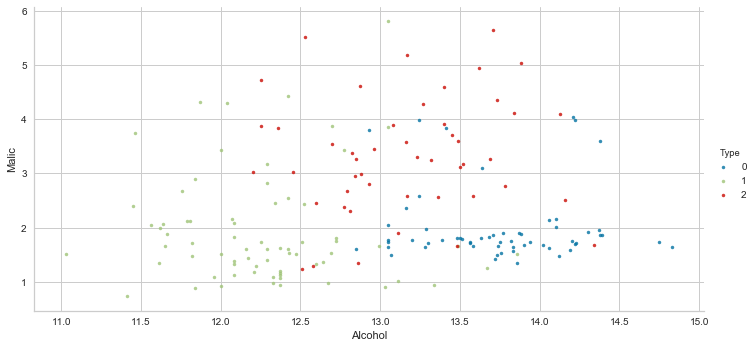

In [17]:
sns.lmplot(x = "Alcohol", y = "Malic", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

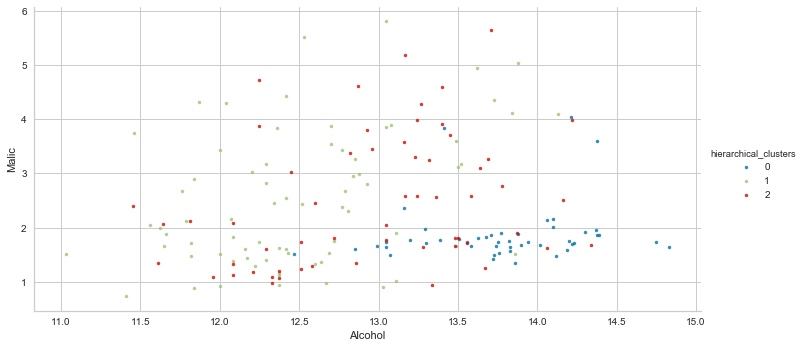

In [18]:
sns.lmplot(x = "Alcohol", y = "Malic", data = X, 
           hue = 'hierarchical_clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)

plt.show()

`Alcalinity` vs. `Magnesium`

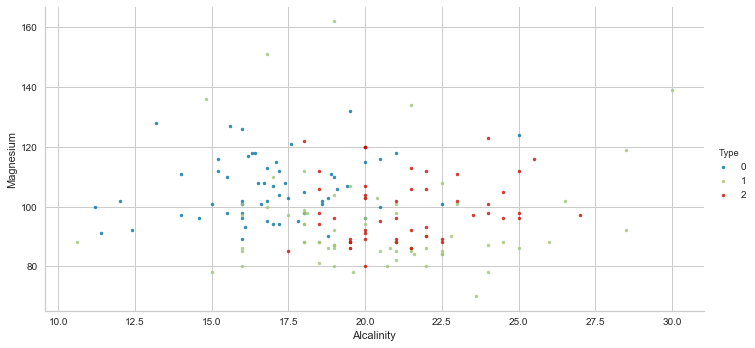

In [19]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

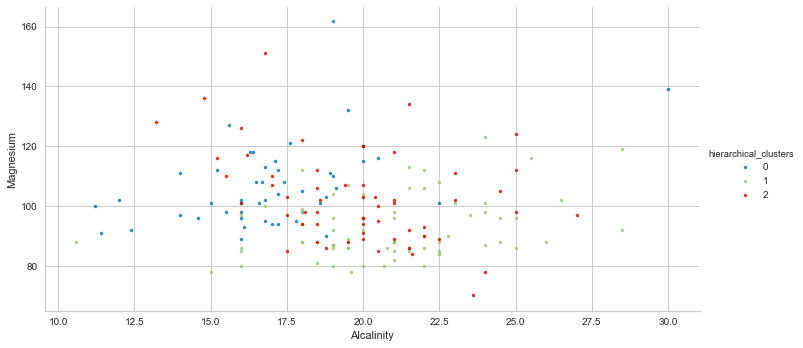

In [20]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = X, 
           hue = 'hierarchical_clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)

plt.show()

`Flavanoids` vs. `Color`

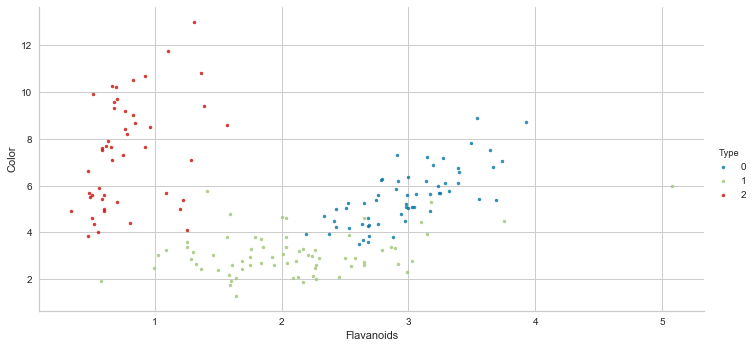

In [21]:
sns.lmplot(x = "Flavanoids", y = "Color", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

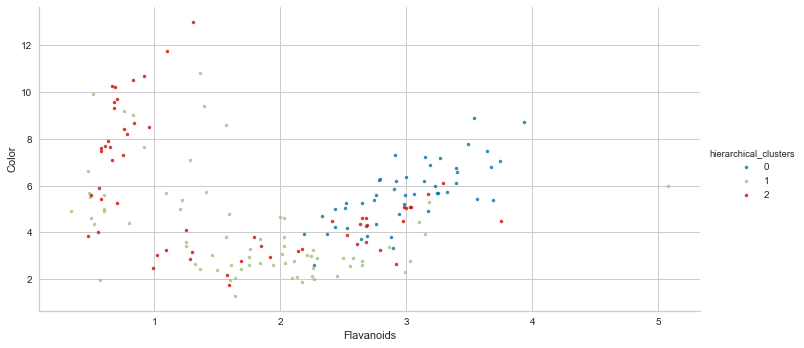

In [22]:
sns.lmplot(x = "Flavanoids", y = "Color", data = X, 
           hue = 'hierarchical_clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [23]:
print(confusion_matrix(y, model_hierarchical_fit.labels_))

[[46  0 13]
 [ 2 51 18]
 [ 0 21 27]]


In [24]:
print(classification_report(y, model_hierarchical_fit.labels_))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        59
           1       0.71      0.72      0.71        71
           2       0.47      0.56      0.51        48

    accuracy                           0.70       178
   macro avg       0.71      0.69      0.69       178
weighted avg       0.73      0.70      0.71       178



## Hierchical Clustering (n_clusters by Elbow method)

In [25]:
from yellowbrick.cluster import KElbowVisualizer

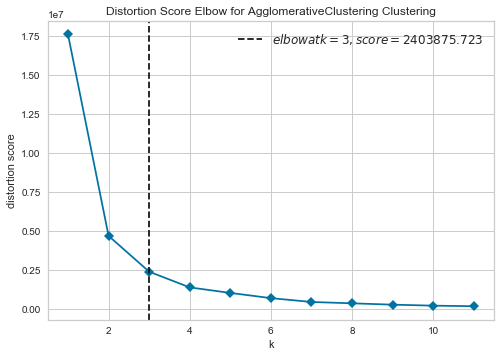

In [26]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False
)

visualizer.fit(X.drop(['hierarchical_clusters'], axis = 1))    
visualizer.poof()   
plt.show()

In [27]:
model_hierarchical_linkage = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
print(model_hierarchical_linkage)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)


In [28]:
model_hierarchical_linkage_fit = model_hierarchical_linkage.fit(X)
model_hierarchical_linkage_fit.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1])

In [29]:
X['hierarchical_clusters'] = model_hierarchical_linkage_fit.labels_
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hierarchical_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


`Flavanoids` vs. `Color`

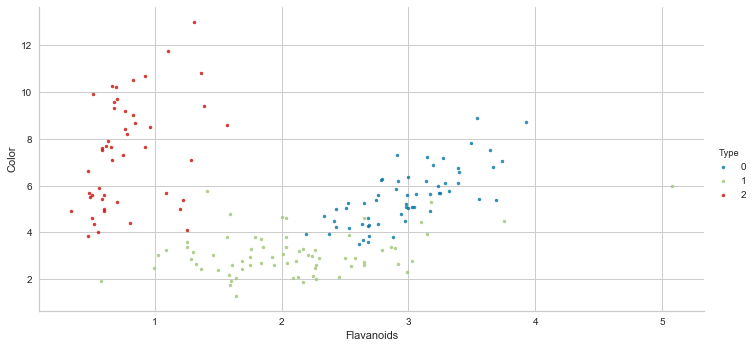

In [30]:
sns.lmplot(x = "Flavanoids", y = "Color", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

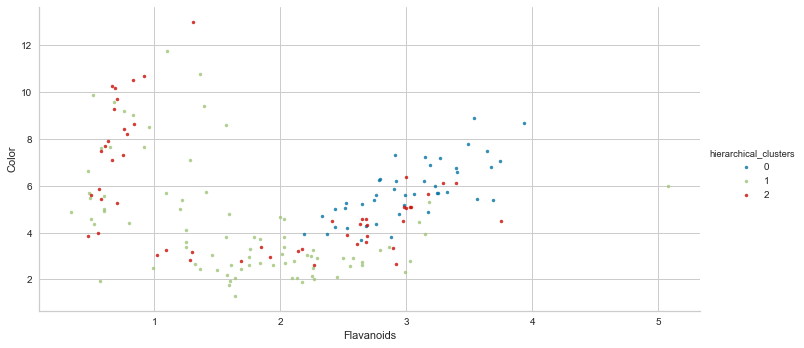

In [31]:
sns.lmplot(x = "Flavanoids", y = "Color", data = X, 
           hue = 'hierarchical_clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [32]:
print(confusion_matrix(y, model_hierarchical_linkage_fit.labels_))

[[43  0 16]
 [ 0 56 15]
 [ 0 27 21]]


In [33]:
print(classification_report(y, model_hierarchical_linkage_fit.labels_))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        59
           1       0.67      0.79      0.73        71
           2       0.40      0.44      0.42        48

    accuracy                           0.67       178
   macro avg       0.69      0.65      0.66       178
weighted avg       0.71      0.67      0.68       178



***